In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
e3nn_ensemble_energies = np.load("e3nn_mean_pred.npy")
CGCNN_ensemble_energies = np.load("CGCNN_mean_pred.npy")
chgnet_energies = np.load("chgnet_per_atom_ternary.npy")

In [3]:
ehull_data_held_out_B = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")

O2P_data_held_out_B = pd.read_json("../../best_models/e3nn/per_site_p_band_data_per_site_unrelaxed_e3nn/1021456/best_0/holdout_set_B_sites_predictions.json")


In [4]:
O2P_data_held_out_B

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,per_site_p_band,idx,predicted_per_site_p_band
0,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998128,"{'@module': 'pymatgen.core.structure', '@class...",423959398,"{'@module': 'pymatgen.core.structure', '@class...",123103556,-265.489796,-6.637245,0.074200,-1.389153,"{'@module': 'pymatgen.core.structure', '@class...",-266.711243,-6.667781,"[-17.5017442981, -16.4627914489, -1.4650019505...",0,"[-17.3751678467, -16.4413585663, -1.5515427589..."
1,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998125,"{'@module': 'pymatgen.core.structure', '@class...",421466237,"{'@module': 'pymatgen.core.structure', '@class...",122979400,-265.627054,-6.640676,0.070768,-1.420044,"{'@module': 'pymatgen.core.structure', '@class...",-266.456848,-6.661421,"[-17.5196675694, -16.4714246517, -1.5223693442...",1,"[-17.410905838, -16.410326004, -1.5399699211, ..."
2,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998126,"{'@module': 'pymatgen.core.structure', '@class...",421466235,"{'@module': 'pymatgen.core.structure', '@class...",122979657,-265.542706,-6.638568,0.072877,-1.424778,"{'@module': 'pymatgen.core.structure', '@class...",-266.213867,-6.655347,"[-17.5508654976, -16.4683612571, -1.513343257,...",2,"[-17.4290904999, -16.4203643799, -1.5438275337..."
3,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998127,"{'@module': 'pymatgen.core.structure', '@class...",421466263,"{'@module': 'pymatgen.core.structure', '@class...",122979417,-265.631202,-6.640780,0.070665,-1.404994,"{'@module': 'pymatgen.core.structure', '@class...",-264.671021,-6.616776,"[-17.496564219, -16.4438265053, -1.4971727612,...",3,"[-17.3572921753, -16.3713817596, -1.525686264,..."
4,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998129,"{'@module': 'pymatgen.core.structure', '@class...",421466289,"{'@module': 'pymatgen.core.structure', '@class...",122979438,-265.628562,-6.640714,0.070731,-1.381979,"{'@module': 'pymatgen.core.structure', '@class...",-266.308624,-6.657716,"[-17.4797529417, -16.4231884613, -1.4775876991...",4,"[-17.2924022675, -16.3576927185, -1.6476016045..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062436,"{'@module': 'pymatgen.core.structure', '@class...",421446419,"{'@module': 'pymatgen.core.structure', '@class...",122979607,-291.947011,-7.298675,0.083433,-1.855526,"{'@module': 'pymatgen.core.structure', '@class...",-289.953644,-7.248841,"[-14.9030627055, -17.2428913671, -2.1136579444...",595,"[-15.1510353088, -17.3952999115, -2.2667446136..."
596,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062439,"{'@module': 'pymatgen.core.structure', '@class...",421459053,"{'@module': 'pymatgen.core.structure', '@class...",122979241,-293.275698,-7.331892,0.050215,-1.358484,"{'@module': 'pymatgen.core.structure', '@class...",-290.115479,-7.252887,"[-14.4681623699, -16.6271803383, -1.4699370683...",596,"[-14.9512577057, -16.9154510498, -1.8188428879..."
597,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062435,"{'@module': 'pymatgen.core.structure', '@class...",421464614,"{'@module': 'pymatgen.core.structure', '@class...",122979281,-291.822920,-7.295573,0.086535,-1.938487,"{'@module': 'pymatgen.core.structure', '@class...",-291.638702,-7.290968,"[-15.1919984736, -17.3414149806, -2.1357504293...",597,"[-15.1679897308, -17.5232391357, -2.2620053291..."
598,Mn4Ni4O24Tb8,Tb

In [5]:
ehull_data_held_out_B["e3nn_ensemble"] = e3nn_ensemble_energies
ehull_data_held_out_B["CGCNN_ensemble"] = CGCNN_ensemble_energies
ehull_data_held_out_B["CHGNET"] = chgnet_energies

In [6]:
import json

path = ""

with open(path+'entropy_dft_held_out.json', 'r') as fp:
    formula_to_entropy_dft = json.load(fp)
    
with open(path+'entropy_CGCNN_held_out.json', 'r') as fp:
    formula_to_entropy_CGCNN = json.load(fp)
    
with open(path+'entropy_e3nn_held_out.json', 'r') as fp:
    formula_to_entropy_e3nn = json.load(fp)
    
with open(path+'Prs_dft_held_out.json', 'r') as fp:
    formula_to_Prs_dft = json.load(fp)
    
with open(path+'Prs_CGCNN_held_out.json', 'r') as fp:
    formula_to_Prs_CGCNN = json.load(fp)
    
with open(path+'Prs_e3nn_held_out.json', 'r') as fp:
    formula_to_Prs_e3nn = json.load(fp)

In [7]:
import json

# Opening JSON file
f = open('ABBO3_degeneracy.json',)
   
# returns JSON object as 
# a dictionary
data = json.load(f)

   
# Closing file
f.close()

degen = np.asarray(list(data['A8_B(4:4)_O24'].values()))

In [8]:
from pymatgen.core import Structure
def add_Op_dft_and_predicted(dataframe):
    
    ML_values = []
    dft_values = []
    
    for i in range(len(dataframe)):
        curr_ML = []
        curr_dft = []
        
        curr_struct = Structure.from_dict(dataframe.iloc[i].unrelaxed_struct)
        
        for j in range(len(curr_struct)):
            if str(curr_struct.species[j])=="O":
                curr_ML.append(dataframe.iloc[i].predicted_per_site_p_band[j])
                curr_dft.append(dataframe.iloc[i].per_site_p_band[j])
        
        ML_values.append(np.asarray(curr_ML))
        dft_values.append(np.asarray(curr_dft))
        
        
    
    
    #ML_values = np.asarray(ML_values)
    #dft_values = np.asarray(dft_values)
    
    dataframe["predicted_Op_band"] = ML_values
    dataframe["per_site_Op_band"] = dft_values
    return dataframe

/home/jypeng/miniconda3/envs/Perovskite_ML_Environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
O2P_data_held_out_B = add_Op_dft_and_predicted(O2P_data_held_out_B)


In [10]:
def get_weighted_distribution(O2Ps,curr_energies):
    #print(O2Ps)
    
    O2Ps = np.stack(list(O2Ps), axis=0)
    kbT = 1300*0.0000861733
    
    
    curr_energies = np.asarray(curr_energies)
    curr_energies -= curr_energies.min()
    weights = np.exp(-(curr_energies*40.0)/kbT)*degen
    weights /= np.sum(weights)
    all_weights = []
    for i in range(len(weights)):
        all_weights.append(np.ones(24)*weights[i])
    
    
    all_weights = np.asarray(all_weights)
    O2P_vals = O2Ps.ravel()
    flat_weights = all_weights.flatten()
    
    
    bins = np.linspace(-5.0,0.5,50)
    

    
    val,bins,_ = plt.hist(O2P_vals,bins=bins,weights=flat_weights,density=True)
    
    return val

In [17]:
def get_weighted_O2p_distributions(dataframe,energies,only_rocksalt=False):
    
    
    formula_to_O2Ps = {}
    

    dataframe["curr_energies"]=energies
    
    
    for curr_formula in dataframe.formula:
        dataframe_filt = dataframe[dataframe.formula == curr_formula]
        dataframe_filt = dataframe_filt.sort_values(by=['unrelaxed_cryst_id'])
        
        O2Ps = dataframe_filt["per_site_Op_band"]
        
        curr_energies = np.asarray(dataframe_filt["curr_energies"].copy())
        if only_rocksalt==True:
            curr_energies+=20.0
            curr_energies[-1]=0.0
        
        formula_to_O2Ps[curr_formula] = get_weighted_distribution(O2Ps,curr_energies)
    
    return formula_to_O2Ps
    
    

In [ ]:
formula_to_dft_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,ehull_data_held_out_B.dft_e_hull)
formula_to_uniform_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,np.ones(600))
formula_to_rocksalt_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,ehull_data_held_out_B.dft_e_hull,only_rocksalt=True)
formula_to_CGCNN_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,ehull_data_held_out_B.CGCNN_ensemble)
formula_to_e3nn_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,ehull_data_held_out_B.e3nn_ensemble)
formula_to_m3gnet_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,ehull_data_held_out_B.M3Gnet_relaxed_energy_per_atom)
formula_to_chgnet_distributions = get_weighted_O2p_distributions(O2P_data_held_out_B,ehull_data_held_out_B.CHGNET)

In [ ]:
dft_all = []
uniform_all = []
rocksalt_all = []
CGCNN_all = []
e3nn_all = []
m3gnet_all = []
chgnet_all  = []

for curr_formula in formula_to_entropy_dft:
    dft_all.append(formula_to_dft_distributions[curr_formula])
    uniform_all.append(formula_to_uniform_distributions[curr_formula])
    rocksalt_all.append(formula_to_rocksalt_distributions[curr_formula])
    CGCNN_all.append(formula_to_CGCNN_distributions[curr_formula])
    e3nn_all.append(formula_to_e3nn_distributions[curr_formula])
    m3gnet_all.append(formula_to_m3gnet_distributions[curr_formula])
    chgnet_all.append(formula_to_chgnet_distributions[curr_formula])

In [ ]:
##### Partition Accuracy

dft_low_entropy = []
uniform_low_entropy = []
rocksalt_low_entropy = []
CGCNN_low_entropy = []
e3nn_low_entropy = []

dft_high_entropy = []
uniform_high_entropy = []
rocksalt_high_entropy = []
CGCNN_high_entropy = []
e3nn_high_entropy = []

dft_low_Prs = []
uniform_low_Prs = []
rocksalt_low_Prs = []
CGCNN_low_Prs = []
e3nn_low_Prs = []

dft_high_Prs = []
uniform_high_Prs = []
rocksalt_high_Prs = []
CGCNN_high_Prs = []
e3nn_high_Prs = []

for curr_formula in formula_to_entropy_dft:
    
    if formula_to_entropy_dft[curr_formula] < 0.5:
        dft_low_entropy.append(formula_to_dft_distributions[curr_formula])
        uniform_low_entropy.append(formula_to_uniform_distributions[curr_formula])
        rocksalt_low_entropy.append(formula_to_rocksalt_distributions[curr_formula])
        CGCNN_low_entropy.append(formula_to_CGCNN_distributions[curr_formula])
        e3nn_low_entropy.append(formula_to_e3nn_distributions[curr_formula])
        
    else:
        dft_high_entropy.append(formula_to_dft_distributions[curr_formula])
        uniform_high_entropy.append(formula_to_uniform_distributions[curr_formula])
        rocksalt_high_entropy.append(formula_to_rocksalt_distributions[curr_formula])
        CGCNN_high_entropy.append(formula_to_CGCNN_distributions[curr_formula])
        e3nn_high_entropy.append(formula_to_e3nn_distributions[curr_formula])
        
    if formula_to_Prs_dft[curr_formula] < 0.05:
        
        dft_low_Prs.append(formula_to_dft_distributions[curr_formula])
        uniform_low_Prs.append(formula_to_uniform_distributions[curr_formula])
        rocksalt_low_Prs.append(formula_to_rocksalt_distributions[curr_formula])
        CGCNN_low_Prs.append(formula_to_CGCNN_distributions[curr_formula])
        e3nn_low_Prs.append(formula_to_e3nn_distributions[curr_formula])
        
    else:
        
        dft_high_Prs.append(formula_to_dft_distributions[curr_formula])
        uniform_high_Prs.append(formula_to_uniform_distributions[curr_formula])
        rocksalt_high_Prs.append(formula_to_rocksalt_distributions[curr_formula])
        CGCNN_high_Prs.append(formula_to_CGCNN_distributions[curr_formula])
        e3nn_high_Prs.append(formula_to_e3nn_distributions[curr_formula])



In [14]:
from scipy.stats import wasserstein_distance

def get_w_dists(list_a,list_b):
    
    dists = []
    
    for i in range(len(list_a)):
        dists.append(wasserstein_distance(list_a[i],list_b[i]))
        
    return np.asarray(dists)

In [ ]:
#### Compute W distances 


uniform_w_dist_all = get_w_dists(dft_all,uniform_all)
rocksalt_w_dist_all = get_w_dists(dft_all,rocksalt_all)
CGCNN_w_dist_all = get_w_dists(dft_all,CGCNN_all)
e3nn_w_dist_all = get_w_dists(dft_all,e3nn_all)

uniform_w_dist_low_entropy = get_w_dists(dft_low_entropy,uniform_low_entropy)
rocksalt_w_dist_low_entropy = get_w_dists(dft_low_entropy,rocksalt_low_entropy)
CGCNN_w_dist_low_entropy = get_w_dists(dft_low_entropy,CGCNN_low_entropy)
e3nn_w_dist_low_entropy = get_w_dists(dft_low_entropy,e3nn_low_entropy)

uniform_w_dist_high_entropy = get_w_dists(dft_high_entropy,uniform_high_entropy)
rocksalt_w_dist_high_entropy = get_w_dists(dft_high_entropy,rocksalt_high_entropy)
CGCNN_w_dist_high_entropy = get_w_dists(dft_high_entropy,CGCNN_high_entropy)
e3nn_w_dist_high_entropy = get_w_dists(dft_high_entropy,e3nn_high_entropy)

uniform_w_dist_low_Prs = get_w_dists(dft_low_Prs,uniform_low_Prs)
rocksalt_w_dist_low_Prs = get_w_dists(dft_low_Prs,rocksalt_low_Prs)
CGCNN_w_dist_low_Prs = get_w_dists(dft_low_Prs,CGCNN_low_Prs)
e3nn_w_dist_low_Prs = get_w_dists(dft_low_Prs,e3nn_low_Prs)

uniform_w_dist_high_Prs = get_w_dists(dft_high_Prs,uniform_high_Prs)
rocksalt_w_dist_high_Prs = get_w_dists(dft_high_Prs,rocksalt_high_Prs)
CGCNN_w_dist_high_Prs = get_w_dists(dft_high_Prs,CGCNN_high_Prs)
e3nn_w_dist_high_Prs = get_w_dists(dft_high_Prs,e3nn_high_Prs)

In [ ]:
print(uniform_w_dist_all.mean())

In [ ]:
print(rocksalt_w_dist_all.mean())

In [ ]:
print(CGCNN_w_dist_all.mean())

In [ ]:
print(e3nn_w_dist_all.mean())

In [ ]:
print(uniform_w_dist_high_entropy.mean())

In [ ]:
print(rocksalt_w_dist_high_entropy.mean())

In [ ]:
print(CGCNN_w_dist_high_entropy.mean())

In [ ]:
print(e3nn_w_dist_high_entropy.mean())

In [ ]:
print(uniform_w_dist_low_entropy.mean())

In [ ]:
print(rocksalt_w_dist_low_entropy.mean())

In [ ]:
print(CGCNN_w_dist_low_entropy.mean())

In [ ]:
print(e3nn_w_dist_low_entropy.mean())

In [ ]:
print(uniform_w_dist_high_Prs.mean())

In [ ]:
print(rocksalt_w_dist_high_Prs.mean())

In [ ]:
print(CGCNN_w_dist_high_Prs.mean())

In [ ]:
print(e3nn_w_dist_high_Prs.mean())

In [ ]:
print(uniform_w_dist_low_Prs.mean())

In [ ]:
print(rocksalt_w_dist_low_Prs.mean())

In [ ]:
print(CGCNN_w_dist_low_Prs.mean())

In [ ]:
print(e3nn_w_dist_low_Prs.mean())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(rocksalt_w_dist_low_Prs)
plt.hist(e3nn_w_dist_low_Prs)

In [ ]:
plt.scatter(rocksalt_w_dist_low_Prs,e3nn_w_dist_low_Prs)

In [33]:
def get_errors_entropy_cutoff_increasing(dft_ref,model,cutoff):
    
    model_stored = []
    dft_stored = []

    for curr_formula in dft_ref:
    
        if formula_to_entropy_dft[curr_formula] > cutoff:
            model_stored.append(model[curr_formula])
            dft_stored.append(dft_ref[curr_formula])
            
    print(len(model_stored))
    
    w_dists = get_w_dists(model_stored,dft_stored)
    return w_dists.mean(),w_dists.std()

In [34]:
def get_errors_entropy_cutoff_decreasing(dft_ref,model,cutoff):
    
    model_stored = []
    dft_stored = []

    for curr_formula in dft_ref:
    
        if formula_to_entropy_dft[curr_formula] < cutoff:
            model_stored.append(model[curr_formula])
            dft_stored.append(dft_ref[curr_formula])
            
    print(len(model_stored))
    
    w_dists = get_w_dists(model_stored,dft_stored)
    return w_dists.mean(),w_dists.std()

In [40]:
def get_error_change_with_entropy(dft_ref,model):
    
    errors_inc = []
    std_inc = []
    
    errors_dec = []
    std_dec = []
    
    cutoff_inc = [0.0,0.2,0.4,0.6,0.8]
    cutoff_dec = [0.2,0.4,0.6,0.8,1.0]
    
    for i in range(len(cutoff_inc)):
        mean,std = get_errors_entropy_cutoff_increasing(dft_ref,model,cutoff_inc[i])
        errors_inc.append(mean)
        std_inc.append(std)
        mean,std = get_errors_entropy_cutoff_decreasing(dft_ref,model,cutoff_dec[i])
        errors_dec.append(mean)
        std_dec.append(std)
    return np.asarray(errors_inc),np.asarray(std_inc),np.asarray(errors_dec),np.asarray(std_dec)

In [41]:
error_inc_uniform,std_inc_uniform,error_dec_uniform,std_dec_uniform = get_error_change_with_entropy(formula_to_dft_distributions,formula_to_uniform_distributions)
error_inc_rocksalt,std_inc_rocksalt,error_dec_rocksalt,std_dec_rocksalt = get_error_change_with_entropy(formula_to_dft_distributions,formula_to_rocksalt_distributions)
error_inc_CGCNN,std_inc_CGCNN,error_dec_CGCNN,std_dec_CGCNN = get_error_change_with_entropy(formula_to_dft_distributions,formula_to_CGCNN_distributions)
error_inc_e3nn,std_inc_e3nn,error_dec_e3nn,std_dec_e3nn = get_error_change_with_entropy(formula_to_dft_distributions,formula_to_e3nn_distributions)
error_inc_m3gnet,std_inc_m3gnet,error_dec_m3gnet,std_dec_m3gnet = get_error_change_with_entropy(formula_to_dft_distributions,formula_to_m3gnet_distributions)
error_inc_chgnet,std_inc_chgnet,error_dec_chgnet,std_dec_chgnet = get_error_change_with_entropy(formula_to_dft_distributions,formula_to_chgnet_distributions)

100
45
55
59
41
68
32
79
21
100
100
45
55
59
41
68
32
79
21
100
100
45
55
59
41
68
32
79
21
100
100
45
55
59
41
68
32
79
21
100
100
45
55
59
41
68
32
79
21
100
100
45
55
59
41
68
32
79
21
100


In [42]:
cutoffs_inc = [0.0,0.2,0.4,0.6,0.8]
cutoffs_dec = [0.2,0.4,0.6,0.8,1.0]

In [51]:
std_inc_uniform

array([0.09895958, 0.08188901, 0.05497469, 0.03062896, 0.01232821])

(0.0, 0.25)

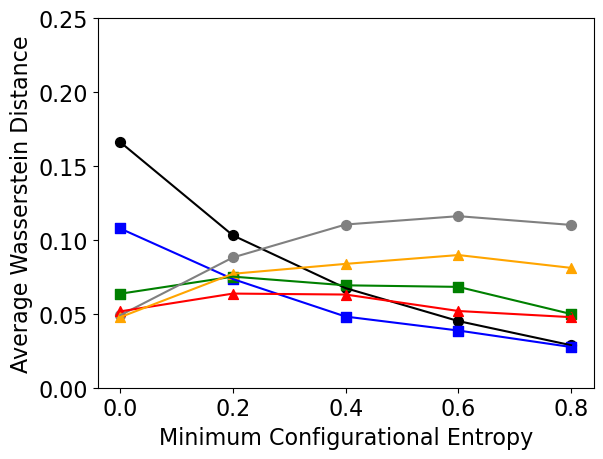

In [82]:
plt.plot(cutoffs_inc,error_inc_uniform,label="Uniform",color="black")
plt.plot(cutoffs_inc,error_inc_CGCNN,label="CGCNN",color="blue")
plt.plot(cutoffs_inc,error_inc_e3nn,label="e3nn",color="green")
plt.plot(cutoffs_inc,error_inc_rocksalt,label="rocksalt",color="grey")
plt.plot(cutoffs_inc,error_inc_m3gnet,label="m3gnet",color="red")
plt.plot(cutoffs_inc,error_inc_chgnet,label="chgnet",color="orange")

plt.scatter(cutoffs_inc,error_inc_uniform,label="Uniform",s=50,color="black")
#plt.errorbar(cutoffs_inc,error_inc_uniform, yerr=std_inc_uniform, fmt="o")

plt.scatter(cutoffs_inc,error_inc_CGCNN,label="CGCNN",marker="s",s=50,color="blue")
#plt.errorbar(cutoffs_inc,error_inc_CGCNN, yerr=std_inc_CGCNN, fmt="o")

plt.scatter(cutoffs_inc,error_inc_e3nn,label="e3nn",marker="s",s=50,color="green")
#plt.errorbar(cutoffs_inc,error_inc_e3nn, yerr=std_inc_e3nn, fmt="o")

plt.scatter(cutoffs_inc,error_inc_rocksalt,label="rocksalt",s=50,color="grey")
#plt.errorbar(cutoffs_inc,error_inc_rocksalt, yerr=std_inc_rocksalt, fmt="o")

plt.scatter(cutoffs_inc,error_inc_m3gnet,label="m3gnet",s=50,marker="^",color="red")
#plt.errorbar(cutoffs_inc,error_inc_m3gnet, yerr=std_inc_m3gnet, fmt="o")

plt.scatter(cutoffs_inc,error_inc_chgnet,label="chgnet",s=50,marker="^",color="orange")
#plt.errorbar(cutoffs_inc,error_inc_chgnet, yerr=std_inc_chgnet, fmt="o")

plt.ylabel("Average Wasserstein Distance",fontsize=16)
plt.xlabel("Minimum Configurational Entropy",fontsize=16)

plt.xticks([0.0,0.2,0.4,0.6,0.8],fontsize=16)
plt.yticks([0.0,0.05,0.1,0.15,0.2,0.25],fontsize=16)

plt.ylim(0.0,0.25)
#plt.legend(bbox_to_anchor=(1.05, 1))

(0.0, 0.25)

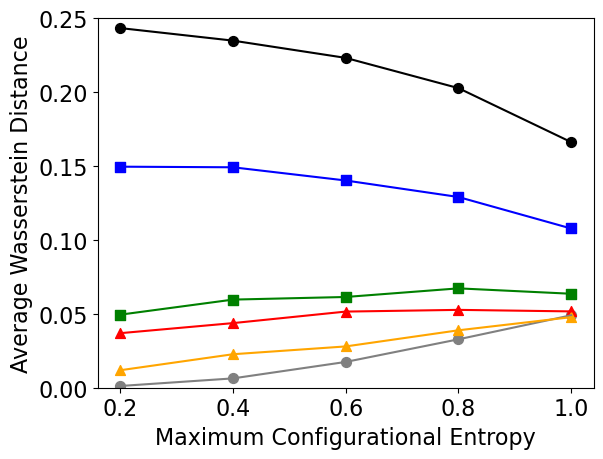

In [84]:
plt.plot(cutoffs_dec,error_dec_uniform,label="Uniform",color="black")
plt.plot(cutoffs_dec,error_dec_CGCNN,label="CGCNN",color="blue")
plt.plot(cutoffs_dec,error_dec_e3nn,label="e3nn",color="green")
plt.plot(cutoffs_dec,error_dec_rocksalt,label="rocksalt",color="grey")
plt.plot(cutoffs_dec,error_dec_m3gnet,label="m3gnet",color="red")
plt.plot(cutoffs_dec,error_dec_chgnet,label="chgnet",color="orange")

plt.scatter(cutoffs_dec,error_dec_uniform,label="Uniform",s=50,color="black")
#plt.errorbar(cutoffs_inc,error_inc_uniform, yerr=std_inc_uniform, fmt="o")

plt.scatter(cutoffs_dec,error_dec_CGCNN,label="CGCNN",marker="s",s=50,color="blue")
#plt.errorbar(cutoffs_inc,error_inc_CGCNN, yerr=std_inc_CGCNN, fmt="o")

plt.scatter(cutoffs_dec,error_dec_e3nn,label="e3nn",marker="s",s=50,color="green")
#plt.errorbar(cutoffs_inc,error_inc_e3nn, yerr=std_inc_e3nn, fmt="o")

plt.scatter(cutoffs_dec,error_dec_rocksalt,label="rocksalt",s=50,color="grey")
#plt.errorbar(cutoffs_inc,error_inc_rocksalt, yerr=std_inc_rocksalt, fmt="o")

plt.scatter(cutoffs_dec,error_dec_m3gnet,label="m3gnet",s=50,marker="^",color="red")
#plt.errorbar(cutoffs_inc,error_inc_m3gnet, yerr=std_inc_m3gnet, fmt="o")

plt.scatter(cutoffs_dec,error_dec_chgnet,label="chgnet",s=50,marker="^",color="orange")
#plt.errorbar(cutoffs_inc,error_inc_chgnet, yerr=std_inc_chgnet, fmt="o")

plt.ylabel("Average Wasserstein Distance",fontsize=16)
plt.xlabel("Maximum Configurational Entropy",fontsize=16)

plt.xticks([0.2,0.4,0.6,0.8,1.0],fontsize=16)
plt.yticks([0.0,0.05,0.1,0.15,0.2,0.25],fontsize=16)

plt.ylim(0.0,0.25)
#plt.legend(bbox_to_anchor=(1.05, 1))

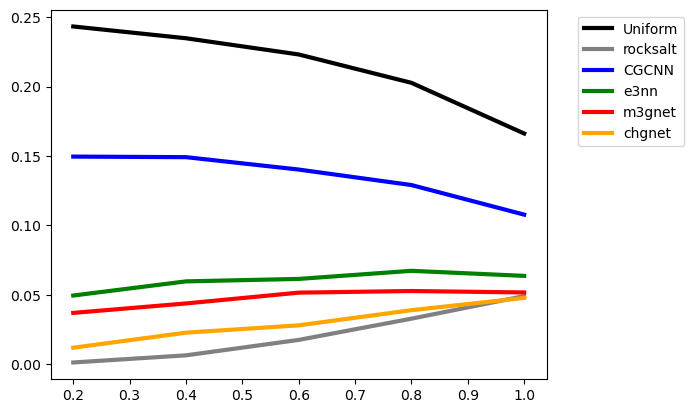

In [97]:
plt.plot(cutoffs_dec,error_dec_uniform,label="Uniform",color="black",linewidth=3)
plt.plot(cutoffs_dec,error_dec_rocksalt,label="rocksalt",color="grey",linewidth=3)
plt.plot(cutoffs_dec,error_dec_CGCNN,label="CGCNN",color="blue",linewidth=3)
plt.plot(cutoffs_dec,error_dec_e3nn,label="e3nn",color="green",linewidth=3)
plt.plot(cutoffs_dec,error_dec_m3gnet,label="m3gnet",color="red",linewidth=3)
plt.plot(cutoffs_dec,error_dec_chgnet,label="chgnet",color="orange",linewidth=3)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig("legend_test_1.pdf",bbox_inches="tight")


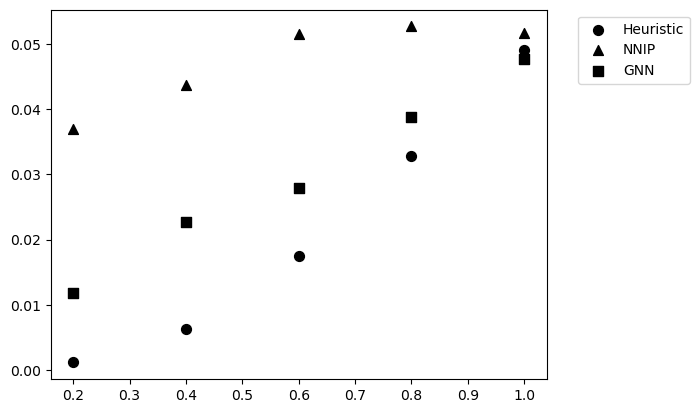

In [95]:
plt.scatter(cutoffs_dec,error_dec_rocksalt,label="Heuristic",s=50,color="black")

plt.scatter(cutoffs_dec,error_dec_m3gnet,label="NNIP",s=50,marker="^",color="black")

plt.scatter(cutoffs_dec,error_dec_chgnet,label="GNN",s=50,marker="s",color="black")

plt.legend(bbox_to_anchor=(1.05, 1))

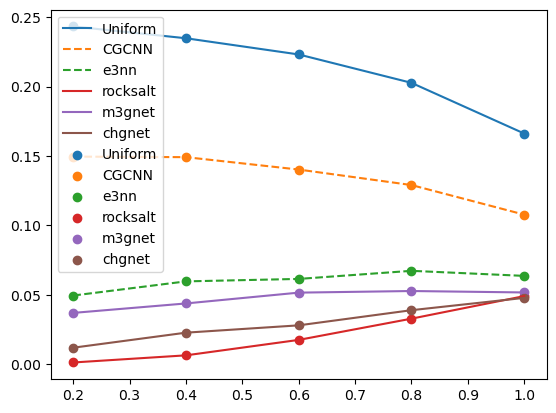

In [65]:
plt.plot(cutoffs_dec,error_dec_uniform,label="Uniform")
plt.plot(cutoffs_dec,error_dec_CGCNN,label="CGCNN",linestyle="dashed")
plt.plot(cutoffs_dec,error_dec_e3nn,label="e3nn",linestyle="dashed")
plt.plot(cutoffs_dec,error_dec_rocksalt,label="rocksalt")
plt.plot(cutoffs_dec,error_dec_m3gnet,label="m3gnet")
plt.plot(cutoffs_dec,error_dec_chgnet,label="chgnet")

plt.scatter(cutoffs_dec,error_dec_uniform,label="Uniform")
plt.scatter(cutoffs_dec,error_dec_CGCNN,label="CGCNN")
plt.scatter(cutoffs_dec,error_dec_e3nn,label="e3nn")
plt.scatter(cutoffs_dec,error_dec_rocksalt,label="rocksalt")
plt.scatter(cutoffs_dec,error_dec_m3gnet,label="m3gnet")
plt.scatter(cutoffs_dec,error_dec_chgnet,label="chgnet")

plt.legend()